In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [70]:
data = pd.read_csv('startup_funding.csv')

data['InvestmentType'].replace('SeedFunding','Seed Funding',inplace=True)
data['InvestmentType'].replace('PrivateEquity','Private Equity',inplace=True)
data['InvestmentType'].replace('Crowd funding','Crowd Funding',inplace=True)

row_data=data['InvestmentType']
a = row_data.value_counts()
explode = [0 , 0 , 1 , 0]
b = a.values.sum()
a = np.array(a)
ans = (a*100/b)
print(ans)

[5.48713623e+01 4.50021088e+01 8.43525938e-02 4.21762969e-02] .2f


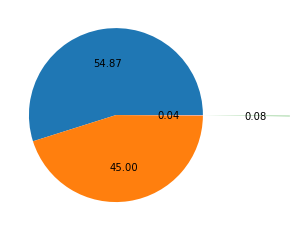

{'Private Equity': 1067,
 'Seed Funding': 1301,
 'Debt Funding': 1,
 nan: 1,
 'Crowd Funding': 2}

In [55]:
plt.pie(a.values,autopct='%.2f',explode=explode)
plt.show()
d = {}
for i in row_data:
    d[i] = d.get(i,0)+1
d

In [56]:
print('Private Equity 54.87')
print('Seed Funding 45.00')
print('Crowd Funding 0.08')
print('Debt Funding 0.04')

Private Equity 54.87
Seed Funding 45.00
Crowd Funding 0.08
Debt Funding 0.04


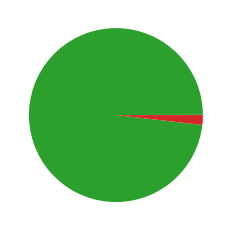

Private Equity 98.15
Seed Funding 1.81
Debt Funding 0.04
Crowd Funding 0.00


In [72]:


import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
data=pd.read_csv('startup_funding.csv')
df=data.copy()
df.dropna(subset = ['InvestmentType'], inplace = True)
df['AmountInUSD'].fillna(0, inplace = True)
df.loc[df['InvestmentType'] == 'PrivateEquity', 'InvestmentType'] = 'Private Equity'
df.loc[df['InvestmentType'] == 'SeedFunding', 'InvestmentType'] = 'Seed Funding'
df.loc[df['InvestmentType'] == 'Crowd funding', 'InvestmentType'] = 'Crowd Funding'
investType = []
amount = []
for i in df['AmountInUSD']:
    amount.append(i)
for i in df['InvestmentType']:
    investType.append(i)
for i in range(len(amount)):
    amount[i] = ''.join(str(amount[i]).split(','))
investType = np.array(investType, dtype = 'str')
amount = np.array(amount, dtype = 'int64')
dic = {}
for i in range(len(investType)):
    if dic.get(investType[i], 0) == 0:
        dic[investType[i]] = amount[i]
    else:
        dic[investType[i]] += amount[i]
lists = sorted(dic.items())
x, y = zip(*lists)
plt.pie(y)
plt.show()
s = 0
for item in dic.items():
    s += item[1]
for item in dic.items():
    print(item[0], format(item[1] * 100 / s, '.2f'))